<a href="https://colab.research.google.com/github/hbhb0311/LikelionStudy/blob/main/4.NLP/4.Chatbot_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 정규화
x_train, x_test = x_train/255.0, x_test/255.0 
# x의 min = 0, x의 max = 255 이기 때문에 간단하게 식으로 나타낼 수 있음

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
# 데이터셋을 섞고 배치 만들기

ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size = 100000)
train_size = int(len(x_train) * 0.7)

# 버퍼사이즈만큼 버퍼를 채운 다음, 버퍼에서 요소를 무작위로 샘플링하여 선택한 요소를 새 요소로 바꿈
# 즉, 섞이지 않은 상태면 처음엔 0의 값, 1의 값 ... 이렇게 분류된 상태로 순서대로 정렬되어 있을 수 있음

train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

# take : 설정한 개수만큼 데이터 가져옴
# skip : 설정한 개수만큼 데이터 지나감(skip)

In [5]:
# 분류 모델 구성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28))) # 28*28 픽셀의 사진, flatten : 2차원의 이미지를 1차원으로 평탄화
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax')) 
# 분류할때 10가지의 경우의 수가 있기 때문에, softmax : 입력받은 값을 출력으로 0~1 사이의 값으로 정규화 -> 확률

# sequential model : 순차모델 - 기본적인 방법
# functional model : 조금 복잡한 모델

In [6]:
# 모델 생성
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [7]:
# 모델 학습
hist = model.fit(train_ds, validation_data = val_ds, epochs = 10)

Epoch 1/10
2100/2100 [==============================] - 10s 4ms/step - loss: 0.8415 - accuracy: 0.7487 - val_loss: 0.4178 - val_accuracy: 0.8782
Epoch 2/10
2100/2100 [==============================] - 8s 4ms/step - loss: 0.3554 - accuracy: 0.8965 - val_loss: 0.3134 - val_accuracy: 0.9084
Epoch 3/10
2100/2100 [==============================] - 8s 4ms/step - loss: 0.3046 - accuracy: 0.9120 - val_loss: 0.2894 - val_accuracy: 0.9164
Epoch 4/10
2100/2100 [==============================] - 8s 4ms/step - loss: 0.2722 - accuracy: 0.9225 - val_loss: 0.2515 - val_accuracy: 0.9275
Epoch 5/10
2100/2100 [==============================] - 8s 4ms/step - loss: 0.2516 - accuracy: 0.9286 - val_loss: 0.2437 - val_accuracy: 0.9305
Epoch 6/10
2100/2100 [==============================] - 8s 4ms/step - loss: 0.2367 - accuracy: 0.9317 - val_loss: 0.2147 - val_accuracy: 0.9387
Epoch 7/10
2100/2100 [==============================] - 7s 3ms/step - loss: 0.2230 - accuracy: 0.9369 - val_loss: 0.2174 - val_accuracy

In [8]:
# 모델 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1870 - accuracy: 0.9422


[0.1869649589061737, 0.9422000050544739]

In [9]:
# 모델 정보 출력
model.summary()

# 모델 저장
model.save('mnist_model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


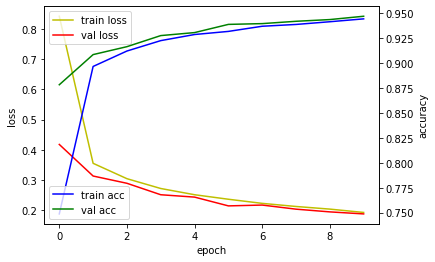

In [10]:
# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx() # twinx : x축은 공유하지만 y축은 공유하지 않을때 사용

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')
plt.show()

### 딥러닝 모델 사용

In [11]:
# 데이터셋 가져오기
_, (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test / 255.0

In [12]:
# 모델 불러오기
model = tf.keras.models.load_model('/content/mnist_model.h5')
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1870 - accuracy: 0.9422


[0.1869649589061737, 0.9422000050544739]

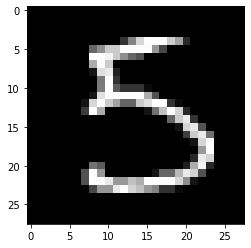

In [13]:
# 테스트셋에서 15번째 이미지 출력
plt.imshow(x_test[15], cmap = 'gray') # 흑백 - gray
plt.show()

In [17]:
# 15번째 이미지의 라벨 확인
print(y_test[15])

# 경고 발생 -> 경고 무시 코드
import warnings 
warnings.filterwarnings('ignore')

# 모델로 라벨 예측
picks = [15]
predict = model.predict(x_test[picks])
print('예측값 : ', predict)

# predict_classes 사라질 예정 -> argmax 사용
pred = np.argmax(model.predict(x_test[picks]), axis=-1)
print('예측값 : ', pred)

5
예측값 :  [[7.0883063e-05 1.4534374e-03 2.3576053e-04 1.5436547e-01 3.0739218e-05
  8.1500757e-01 5.6953768e-06 9.4071339e-04 2.7783427e-02 1.0632661e-04]]
예측값 :  [5]


## 챗봇 모델 구현

### 전처리

In [18]:
import pandas as pd
import tensorflow as tf

In [19]:
# 데이터 불러오기
train_file = '/content/drive/MyDrive/멋쟁이사자처럼/dataset/chatbot_data.csv'
data = pd.read_csv(train_file)

features = data['Q'].tolist()
labels = data['label'].tolist()

features

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨',
 'SNS보면 나만 빼고 다 행복해보여',
 '가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '가스비 장난 아님',
 '가장 확실한 건 뭘까?',
 '가족 여행 가기로 했어',
 '가족 여행 고고',
 '가족 여행 어디로 가지?',
 '가족 있어?',
 '가족관계 알려 줘',
 '가족끼리 여행간다.',
 '가족들 보고 싶어',
 '가족들이랑 서먹해',
 '가족들이랑 서먹해졌어',
 '가족들이랑 어디 가지?',
 '가족들이랑 여행 갈거야',
 '가족여행 가야지',
 '가족이 누구야?',
 '가족이랑 여행 가려고',
 '가족한테 스트레스 풀었어',
 '가출할까?',
 '가출해도 갈 데가 없어',
 '간만에 떨리니까 좋더라',
 '간만에 쇼핑 중',
 '간만에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까?',
 '감 말랭이 먹고 싶다.',
 '감 말랭이 먹어야지',
 '감기 같애',
 '감기 걸린 것 같아',
 '감기 기운이 있어',
 '감기 들 거 같애',
 '감기가 오려나',
 '감기약이 없어',
 '감기인거 같애',
 '감미로운 목소리 좋아',
 '감정이 쓰레기통처럼 엉망진창이야',
 '감정컨트롤을 못하겠어',
 '감정컨트롤이 안돼',
 '감히 나를 무시하는 애가 있어',
 '갑자기 나쁜 생각이 막 들더라',
 '갑자기 눈물 나',

In [20]:
# 텍스트 토큰화, 단어 인덱스 시퀀스 벡터 
corpus = [tf.keras.preprocessing.text.text_to_word_sequence(text) for text in features]
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.
# 현재 Tokenizer 객체를 해당 데이터에 맞게 fitting 해준다. (각 단어 인덱스를 체크하여 각 인덱스별로 벡터를 적절하게 결정한다)

sequences = tokenizer.texts_to_sequences(corpus)
# texts_to_sequences에 사용할 문자열을 넣으면 해당 문자열의 각 단어에 인덱스를 부여해준다. 

word_index = tokenizer.word_index
# tokenizer의 word_index 속성은 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환

In [21]:
word_index

{'너무': 1,
 '좋아하는': 2,
 '거': 3,
 '싶어': 4,
 '같아': 5,
 '안': 6,
 '나': 7,
 '좀': 8,
 '사람': 9,
 '내가': 10,
 '싶다': 11,
 '어떻게': 12,
 '썸': 13,
 '왜': 14,
 '내': 15,
 '사람이': 16,
 '이별': 17,
 '것': 18,
 '잘': 19,
 '없어': 20,
 '수': 21,
 '오늘': 22,
 '자꾸': 23,
 '이제': 24,
 '있어': 25,
 '또': 26,
 '많이': 27,
 '다': 28,
 '있을까': 29,
 '헤어진지': 30,
 '해': 31,
 '다시': 32,
 '될까': 33,
 '여자친구가': 34,
 '남자친구가': 35,
 '더': 36,
 '진짜': 37,
 '정말': 38,
 '게': 39,
 '나를': 40,
 '뭐': 41,
 '좋아': 42,
 '할까': 43,
 '하고': 44,
 '하는': 45,
 '연애': 46,
 '있는': 47,
 '계속': 48,
 '힘드네': 49,
 '연락': 50,
 '이': 51,
 '나만': 52,
 '먹고': 53,
 '이렇게': 54,
 '있는데': 55,
 '못': 56,
 '날': 57,
 '혼자': 58,
 '다른': 59,
 '방법': 60,
 '타는': 61,
 '한': 62,
 '그': 63,
 '안돼': 64,
 '그냥': 65,
 '없는': 66,
 '돼': 67,
 '짝남이': 68,
 '좋겠다': 69,
 '선물': 70,
 '모르겠어': 71,
 '같이': 72,
 '나한테': 73,
 '같은데': 74,
 '싫어': 75,
 '친구가': 76,
 '마음이': 77,
 '짝사랑': 78,
 '가고': 79,
 '사랑': 80,
 '헤어진': 81,
 '많아': 82,
 '힘들어': 83,
 '연락이': 84,
 '줄': 85,
 '좋겠어': 86,
 '술': 87,
 '후': 88,
 '짝남': 89,
 '듯': 90,
 '좋은': 91,
 '좋을까

In [22]:
MAX_SEQ_LEN = 15 
padded_seqs = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen = MAX_SEQ_LEN, padding = 'post')
# 시퀀스 번호로 만든 벡터의 크기가 다 다르기 때문에 패딩 처리를 해줌
# padding : pre, post -> 시퀀스 뒤에 0이 붙음 
# 최대 길이를 너무 크게 잡으면 빈 공간이 많이 생겨 낭비 발생, 너무 작게 잡으면 입력 데이터가 손상되는 상황 발생
padded_seqs

array([[ 4646,  4647,     0, ...,     0,     0,     0],
       [ 4648,   343,   448, ...,     0,     0,     0],
       [ 2580,   803,    11, ...,     0,     0,     0],
       ...,
       [13395,  2517,    89, ...,     0,     0,     0],
       [  147,    46,    91, ...,     0,     0,     0],
       [  555, 13398,     0, ...,     0,     0,     0]], dtype=int32)

In [23]:
features

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨',
 'SNS보면 나만 빼고 다 행복해보여',
 '가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '가스비 장난 아님',
 '가장 확실한 건 뭘까?',
 '가족 여행 가기로 했어',
 '가족 여행 고고',
 '가족 여행 어디로 가지?',
 '가족 있어?',
 '가족관계 알려 줘',
 '가족끼리 여행간다.',
 '가족들 보고 싶어',
 '가족들이랑 서먹해',
 '가족들이랑 서먹해졌어',
 '가족들이랑 어디 가지?',
 '가족들이랑 여행 갈거야',
 '가족여행 가야지',
 '가족이 누구야?',
 '가족이랑 여행 가려고',
 '가족한테 스트레스 풀었어',
 '가출할까?',
 '가출해도 갈 데가 없어',
 '간만에 떨리니까 좋더라',
 '간만에 쇼핑 중',
 '간만에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까?',
 '감 말랭이 먹고 싶다.',
 '감 말랭이 먹어야지',
 '감기 같애',
 '감기 걸린 것 같아',
 '감기 기운이 있어',
 '감기 들 거 같애',
 '감기가 오려나',
 '감기약이 없어',
 '감기인거 같애',
 '감미로운 목소리 좋아',
 '감정이 쓰레기통처럼 엉망진창이야',
 '감정컨트롤을 못하겠어',
 '감정컨트롤이 안돼',
 '감히 나를 무시하는 애가 있어',
 '갑자기 나쁜 생각이 막 들더라',
 '갑자기 눈물 나',

### 데이터셋 나누기

In [24]:
# 데이터셋 생성 학습 : 검증 : 테스트 = 7:2:1
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))

train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)

train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).take(val_size).batch(20)
test_ds = ds.skip(train_size + val_size).take(test_size).batch(20)

### 모델 구축

In [25]:
# 하이퍼파라미터 설정
dropout_prob = 0.5
EMB_SIZE = 128
EPOCH = 5
VOCAB_SIZE = len(word_index) + 1

In [26]:
# CNN 모델 정의
input_layer = tf.keras.layers.Input(shape = (MAX_SEQ_LEN, ))

In [27]:
embedding_layer = tf.keras.layers.Embedding(input_dim = VOCAB_SIZE, output_dim = EMB_SIZE, input_length = MAX_SEQ_LEN)(input_layer)
# input_dim은 단어의 개수. 즉, 단어 집합(vocabulary)의 크기이다.
# output_dim은 임베딩한 후의 벡터의 크기이다.
# input_length는 각 입력 시퀀스의 길이이다.

In [28]:
dropout_emb = tf.keras.layers.Dropout(rate = dropout_prob)(embedding_layer)
# 50%로 dropout 해줌, 과적합 대비

In [29]:
# 임베딩 벡터에서 특징 추출하는 영역 구현
conv1 = tf.keras.layers.Conv1D(filters = 128, kernel_size = 3, padding = 'valid', activation = tf.nn.relu)(dropout_emb)
pool1 = tf.keras.layers.GlobalMaxPool1D()(conv1)
conv2 = tf.keras.layers.Conv1D(filters = 128, kernel_size = 4, padding = 'valid', activation = tf.nn.relu)(dropout_emb)
pool2 = tf.keras.layers.GlobalMaxPool1D()(conv2)
conv3 = tf.keras.layers.Conv1D(filters = 128, kernel_size = 5, padding = 'valid', activation = tf.nn.relu)(dropout_emb)
pool3 = tf.keras.layers.GlobalMaxPool1D()(conv3)
# filters : 합성곱 필터의 개수 
# kernel_size : 필터의 크기 (3x3, 4x4, 5x5)
# GlobalMaxPool : 최대 풀링 연산

concat = tf.keras.layers.concatenate([pool1, pool2, pool3])
# 병렬로 처리된 합성곱 계층의 특징맵 결과를 하나로 묶어줌

In [30]:
# CNN의 완전 연결 계층 구현
hidden = tf.keras.layers.Dense(units = 128, activation = tf.nn.relu)(concat)
dropout_hidden = tf.keras.layers.Dropout(rate = dropout_prob)(hidden)
logits = tf.keras.layers.Dense(units = 3, name = 'logits')(dropout_hidden)
# 3가지 클래스로 감정 분류해야 하기 때문에 units : 3
# 신경망이 예측하는 최종 단계이기 때문에 활성화 함수 사용하지 않음, 이번 계층에서 결과로 나온 값을 점수라고 부름

predictions = tf.keras.layers.Dense(units = 3, activation = tf.nn.softmax)(logits)
# logits에서 나온 점수로 소프트맥스 계층을 통해 클래스별 확률을 계산

In [31]:
# 모델 생성
model = tf.keras.models.Model(inputs = input_layer, outputs = predictions)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [32]:
# 모델 학습
model.fit(train_ds, epochs = EPOCH, validation_data = val_ds)

Epoch 1/5
414/414 [==============================] - 29s 10ms/step - loss: 0.9105 - accuracy: 0.5614 - val_loss: 0.6899 - val_accuracy: 0.6751
Epoch 2/5
414/414 [==============================] - 4s 9ms/step - loss: 0.6119 - accuracy: 0.7504 - val_loss: 0.3133 - val_accuracy: 0.9006
Epoch 3/5
414/414 [==============================] - 4s 9ms/step - loss: 0.3506 - accuracy: 0.8801 - val_loss: 0.1833 - val_accuracy: 0.9404
Epoch 4/5
414/414 [==============================] - 4s 9ms/step - loss: 0.2228 - accuracy: 0.9282 - val_loss: 0.1069 - val_accuracy: 0.9649
Epoch 5/5
414/414 [==============================] - 4s 9ms/step - loss: 0.1488 - accuracy: 0.9538 - val_loss: 0.0702 - val_accuracy: 0.9788


In [33]:
# 모델 평가
model.evaluate(test_ds)

60/60 [==============================] - 0s 4ms/step - loss: 0.0791 - accuracy: 0.9763


[0.0790531188249588, 0.9763113260269165]

In [34]:
model.save('cnn_model.h5')

### 모델 불러와 테스트

In [35]:
# 데이터 불러오기
train_file = '/content/drive/MyDrive/멋쟁이사자처럼/dataset/chatbot_data.csv'
data = pd.read_csv(train_file)

features = data['Q'].tolist()
labels = data['label'].tolist()

In [36]:
# 단어 인덱스 시퀀스 벡터
corpus = [tf.keras.preprocessing.text.text_to_word_sequence(text) for text in features]
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

# 패딩 처리
MAX_SEQ_LEN = 15
padded_seqs = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen = MAX_SEQ_LEN, padding = 'post')

# 테스트용 데이터셋 설정
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
test_ds = ds.take(15000).batch(20)

# 감정 분류 모델 불러오기
model = tf.keras.models.load_model('/content/cnn_model.h5')
model.summary()
model.evaluate(test_ds)

# 테스트용 데이터셋의 11000번째 데이터 출력
print('단어 시퀀스 : ', corpus[11000])
print('단어 인덱스 시퀀스 : ', padded_seqs[11000])
print('문장 분류(정답) : ', labels[11000])

# 감정 예측
picks = [11000]
predict = model.predict(padded_seqs[picks])
predict_class = tf.math.argmax(predict, axis = 1)
print('감정 예측 점수 : ', predict)
print('감정 예측 클래스 : ', predict_class.numpy())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 15, 128)      1715072     input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 15, 128)      0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 13, 128)      49280       dropout[0][0]                    
______________________________________________________________________________________________